In [11]:
%matplotlib inline

In [15]:
import torch 
from torch.autograd import Variable 
import matplotlib.pyplot as plt 

#data prep
x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

#model generation 
class Model(torch.nn.Module):
    
    """
    # torch.nn은 torch.neural network 를 의미한다. 
    # nn.Module은 여러개의 레이어와 output을 return하는 forward(input) 메소드를 
    # 포함한다. 
    
    # 모든 뉴럴 네트워크는 기본 클래스 nn.Module로부터 파생 
    # 생성자(constructor)에서 사용하고자 하는 모든 레이어를 선언 
    # forward(input)함수에서 입력으로부터 결과까지 모델이 어떻게 실행되는지 정의
    
    # torch.nn 은 mini-batch만을 지원한다. 전체 torch.nn 패키지는 mini-batch
    # 형태인 입력만을 지우너하며, 단일 데이터는 입력으로 지원하지 않는다. 
    # 만약 단일 샘플(1개의 데이터)이 있다면 input.unsqueeze(0)을 사용하여 
    # 가짜 임시 배치 차원을 추가
    
    """
    
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module 
        
        """
        
        super(Model,self).__init__()
        #torch.nn.Module 클래스를 초기화시킴 
        
        self.linear = torch.nn.Linear(1,1)  
        #input label 1, output label 1 
        
    def forward(self, x):
        """
        In the forward function we acceapt a Variable of input data and 
        we must return of output data. We can use Modules defined in the 
        constructor as well as arbitraty operators on Variables 
        
        """
        y_pred = self.linear(x)
        return y_pred 
    
#our model
model = Model()

# Construct our loss function and Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two 
# nn.Linear modules which are members of the model. 


criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.MSELoss(size_average=False)  #prevous version이다. 
#arg에는 reduction과 size_average 를 가질 수 있지만 reduction이 최신 버전 
#reduction은 none, mean, sum 값을 가지며 각각 출력값의 none, mean, sum을 의미 
#한편, size_average를 False로 하면 출력값을(?) 평균으로 나누지 않는다.

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
#생성한 파리미터들을 옵티마이저에 전달, SGD를 이용(mini batch를 활용한 GD)하여 
#optimizing을 수행한다. 

epoch_list = []
loss_list = []

#Training loop 
for epoch in range(500):
    # 1) forward pass : Compute predicted y by passing x to the model 
    y_pred = model(x_data)
    
    # 2) Compute and print loss 
    loss = criterion(y_pred,y_data)
    print(f'Epoch: {epoch} | Loss : {loss.item()}')
    #loss는 (1,) 형태의 tensor이며, loss.item() 은 loss의 스칼라 값이다. 
    # 포맷 문자열 리터럴 ; f(ormat)' {variable} {variable}' 형식
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    #Zero gradients, perform a backward pass, and update the weights. 
    optimizer.zero_grad() #역전파를 실행하기 전 gradient를 0으로 만든다 
    loss.backward() #모델의 매개변수에 대한 손실의 변화도를 계산한다. 
    optimizer.step() #optimizer의 step 함수를 통해 매개변수를 update 한다. 
    
    
# After training 
hour_var = torch.Tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)", 4, model(hour_var).data[0][0].item())

Epoch: 0 | Loss : 48.96630859375
Epoch: 1 | Loss : 21.809722900390625
Epoch: 2 | Loss : 9.72021770477295
Epoch: 3 | Loss : 4.33815336227417
Epoch: 4 | Loss : 1.9420541524887085
Epoch: 5 | Loss : 0.8752221465110779
Epoch: 6 | Loss : 0.40014591813087463
Epoch: 7 | Loss : 0.18850472569465637
Epoch: 8 | Loss : 0.09413868933916092
Epoch: 9 | Loss : 0.05198286846280098
Epoch: 10 | Loss : 0.03307148069143295
Epoch: 11 | Loss : 0.024509858340024948
Epoch: 12 | Loss : 0.020557938143610954
Epoch: 13 | Loss : 0.018659915775060654
Epoch: 14 | Loss : 0.017678314819931984
Epoch: 15 | Loss : 0.017106657847762108
Epoch: 16 | Loss : 0.016719460487365723
Epoch: 17 | Loss : 0.016416218131780624
Epoch: 18 | Loss : 0.016152294352650642
Epoch: 19 | Loss : 0.01590774953365326
Epoch: 20 | Loss : 0.01567351445555687
Epoch: 21 | Loss : 0.015445776283740997
Epoch: 22 | Loss : 0.015222672373056412
Epoch: 23 | Loss : 0.015003475360572338
Epoch: 24 | Loss : 0.014787609688937664
Epoch: 25 | Loss : 0.0145749934017658

Epoch: 220 | Loss : 0.0008663478656671941
Epoch: 221 | Loss : 0.0008538821712136269
Epoch: 222 | Loss : 0.0008416248601861298
Epoch: 223 | Loss : 0.0008295315783470869
Epoch: 224 | Loss : 0.000817610532976687
Epoch: 225 | Loss : 0.0008058467647060752
Epoch: 226 | Loss : 0.0007942731608636677
Epoch: 227 | Loss : 0.0007828531670384109
Epoch: 228 | Loss : 0.0007715966203249991
Epoch: 229 | Loss : 0.0007605210412293673
Epoch: 230 | Loss : 0.0007495876052416861
Epoch: 231 | Loss : 0.0007388108060695231
Epoch: 232 | Loss : 0.0007281872676685452
Epoch: 233 | Loss : 0.000717729504685849
Epoch: 234 | Loss : 0.0007074200548231602
Epoch: 235 | Loss : 0.0006972389528527856
Epoch: 236 | Loss : 0.0006872261292301118
Epoch: 237 | Loss : 0.0006773507921025157
Epoch: 238 | Loss : 0.0006676160264760256
Epoch: 239 | Loss : 0.0006580173503607512
Epoch: 240 | Loss : 0.0006485666381195188
Epoch: 241 | Loss : 0.0006392416544258595
Epoch: 242 | Loss : 0.0006300585810095072
Epoch: 243 | Loss : 0.00062099267961

Epoch: 421 | Loss : 4.7212695790221915e-05
Epoch: 422 | Loss : 4.653117503039539e-05
Epoch: 423 | Loss : 4.586169961839914e-05
Epoch: 424 | Loss : 4.520683432929218e-05
Epoch: 425 | Loss : 4.455552334547974e-05
Epoch: 426 | Loss : 4.391625407151878e-05
Epoch: 427 | Loss : 4.328237992012873e-05
Epoch: 428 | Loss : 4.266183896106668e-05
Epoch: 429 | Loss : 4.20484175265301e-05
Epoch: 430 | Loss : 4.144468402955681e-05
Epoch: 431 | Loss : 4.084828469785862e-05
Epoch: 432 | Loss : 4.026137321488932e-05
Epoch: 433 | Loss : 3.9681272028246894e-05
Epoch: 434 | Loss : 3.911156818503514e-05
Epoch: 435 | Loss : 3.855175236822106e-05
Epoch: 436 | Loss : 3.799812839133665e-05
Epoch: 437 | Loss : 3.74509982066229e-05
Epoch: 438 | Loss : 3.6913130315952e-05
Epoch: 439 | Loss : 3.638090493041091e-05
Epoch: 440 | Loss : 3.5859167837770656e-05
Epoch: 441 | Loss : 3.5342920455150306e-05
Epoch: 442 | Loss : 3.4836255508707836e-05
Epoch: 443 | Loss : 3.4334945667069405e-05
Epoch: 444 | Loss : 3.3840322430

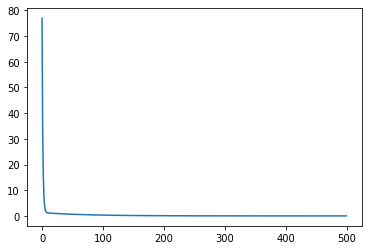

In [14]:
plt.plot(epoch_list,loss_list)
plt.show()

## torch.nn 

    # torch.nn은 torch.neural network 를 의미한다. 
    # nn.Module은 여러개의 레이어와 output을 return하는 forward(input) 메소드를 포함 
    
    # 모든 뉴럴 네트워크는 기본 클래스 nn.Module로부터 파생 
    # 생성자(constructor)에서 사용하고자 하는 모든 레이어를 선언 
    # forward(input)함수에서 입력으로부터 결과까지 모델이 어떻게 실행되는지 정의
    
    # torch.nn 은 mini-batch만을 지원. 전체 torch.nn 패키지는 mini-batch 형태 입력만 지원
    # 단일 데이터는 입력으로 지원 XXX
    # 만약 단일 샘플(1개의 데이터)이 있다면 input.unsqueeze(0)을 사용해, 가짜 임시 배치 차원 추가
    